In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Define dataset paths
#Dataset is divided and made into small dataset due to absence og GPU
train_dir = '/content/drive/MyDrive/images_small/train'
val_dir = '/content/drive/MyDrive/images_small/validation'
test_dir = '/content/drive/MyDrive/images_small/test'

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=128,  # Increased batch size
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(48, 48),
    batch_size=128,  # Increased batch size
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    batch_size=128,  # Increased batch size
    class_mode='categorical',
    shuffle=False
)

# Model architecture
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
        MaxPooling2D((2, 2)),
        Dropout(0.3),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.3),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.3),

        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(7, activation='softmax')
    ])
    return model

model = create_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for learning rate adjustment and checkpointing
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=50,
    callbacks=[reduce_lr, checkpoint, early_stopping]
)

# Evaluate the model
val_loss, val_acc = model.evaluate(val_generator)
print(f'Validation accuracy: {val_acc:.2f}')

test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc:.2f}')

# Save the final model
model.save('/content/emotion_detection_model.h5')

# Optional: Download the model to your local machine
from google.colab import files
files.download('/content/emotion_detection_model.h5')


Num GPUs Available:  0
Found 5385 images belonging to 7 classes.
Found 1411 images belonging to 7 classes.
Found 380 images belonging to 7 classes.
Epoch 1/50
42/42 [==============================] - 1174s 28s/step - loss: 1.8388 - accuracy: 0.2422 - val_loss: 1.8607 - val_accuracy: 0.2592 - lr: 0.0010


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/50
42/42 [==============================] - 48s 1s/step - loss: 1.8179 - accuracy: 0.2500 - val_loss: 1.8468 - val_accuracy: 0.2585 - lr: 0.0010
Epoch 3/50
42/42 [==============================] - 45s 1s/step - loss: 1.8074 - accuracy: 0.2524 - val_loss: 1.8298 - val_accuracy: 0.2592 - lr: 0.0010
Epoch 4/50
42/42 [==============================] - 43s 1s/step - loss: 1.7919 - accuracy: 0.2600 - val_loss: 1.7949 - val_accuracy: 0.2642 - lr: 0.0010
Epoch 5/50
42/42 [==============================] - 46s 1s/step - loss: 1.7658 - accuracy: 0.2646 - val_loss: 1.7357 - val_accuracy: 0.3026 - lr: 0.0010
Epoch 6/50
42/42 [==============================] - 42s 983ms/step - loss: 1.7340 - accuracy: 0.2931 - val_loss: 1.6820 - val_accuracy: 0.3445 - lr: 0.0010
Epoch 7/50
42/42 [==============================] - 47s 1s/step - loss: 1.6872 - accuracy: 0.3310 - val_loss: 1.6502 - val_accuracy: 0.3651 - lr: 0.0010
Epoch 8/50
42/42 [==============================] - 43s 1s/step - loss: 1.6520 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

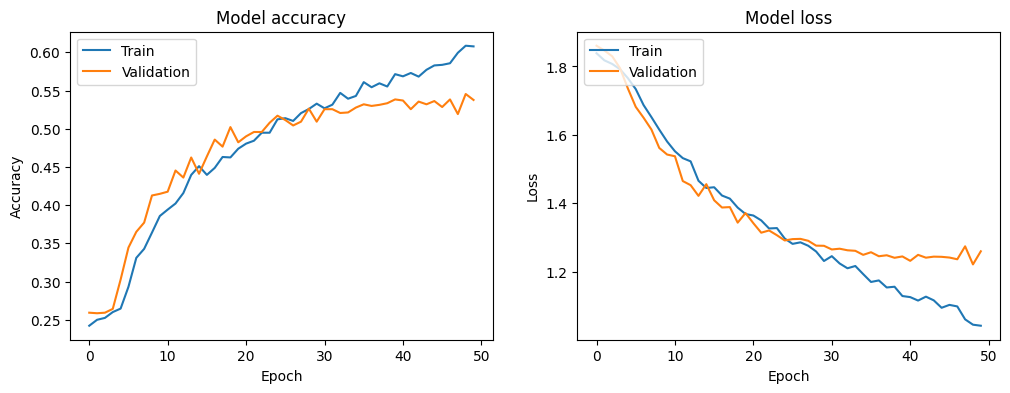

In [4]:
import matplotlib.pyplot as plt

# Plotting the training history
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

# Assuming 'history' is the variable containing the training history
plot_history(history)


In [5]:
# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(val_generator)
print(f'Validation Loss: {val_loss:.4f}')
print(f'Validation Accuracy: {val_acc:.4f}')


12/12 [==============================] - 7s 594ms/step - loss: 1.2581 - accuracy: 0.5386
Validation Loss: 1.2581
Validation Accuracy: 0.5386


In [6]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')

3/3 [==============================] - 2s 631ms/step - loss: 1.4947 - accuracy: 0.4526
Test Loss: 1.4947
Test Accuracy: 0.4526


3/3 [==============================] - 4s 1s/step
Test Accuracy: 0.4526


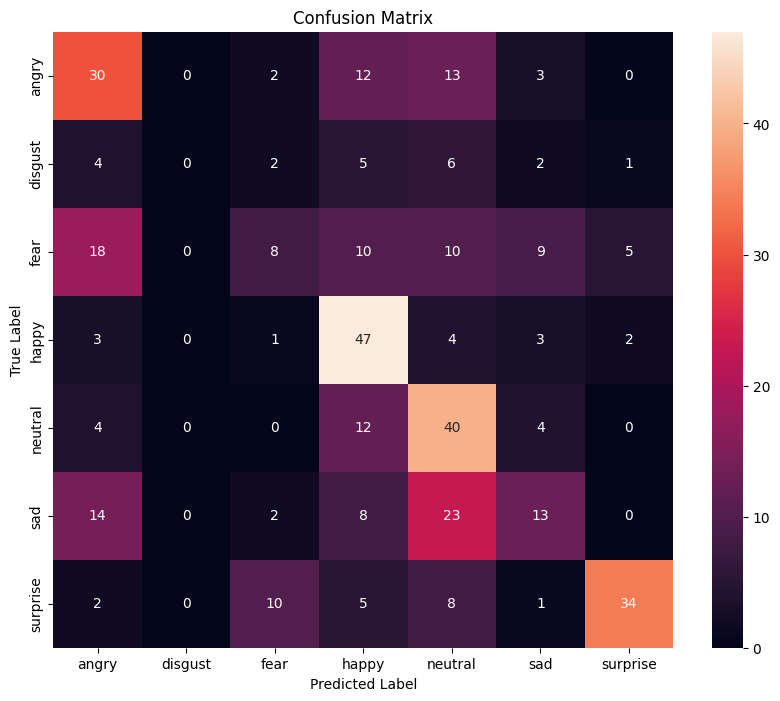

Classification Report:
               precision    recall  f1-score   support

       angry       0.40      0.50      0.44        60
     disgust       0.00      0.00      0.00        20
        fear       0.32      0.13      0.19        60
       happy       0.47      0.78      0.59        60
     neutral       0.38      0.67      0.49        60
         sad       0.37      0.22      0.27        60
    surprise       0.81      0.57      0.67        60

    accuracy                           0.45       380
   macro avg       0.39      0.41      0.38       380
weighted avg       0.44      0.45      0.42       380


Misclassified Examples:
Image 4: Predicted as happy, True label: angry
Image 6: Predicted as sad, True label: angry
Image 7: Predicted as neutral, True label: angry
Image 9: Predicted as happy, True label: angry
Image 11: Predicted as happy, True label: angry
Image 12: Predicted as neutral, True label: angry
Image 14: Predicted as neutral, True label: angry
Image 15: Predicte

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
# Predicting emotions for the final test set
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get the ground truth labels
true_classes = test_generator.classes

# Mapping predictions to class labels
class_labels = list(test_generator.class_indices.keys())
predicted_labels = [class_labels[i] for i in predicted_classes]
true_labels = [class_labels[i] for i in true_classes]

# Calculate and display accuracy
test_accuracy = accuracy_score(true_classes, predicted_classes)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
class_report = classification_report(true_classes, predicted_classes, target_names=class_labels, zero_division='warn')
print('Classification Report:\n', class_report)

# Display some misclassified examples
misclassified_indices = np.where(predicted_classes != true_classes)[0]
if len(misclassified_indices) > 0:
    print("\nMisclassified Examples:")
    for i in range(min(10, len(misclassified_indices))):
        idx = misclassified_indices[i]
        print(f'Image {idx+1}: Predicted as {predicted_labels[idx]}, True label: {true_labels[idx]}')
else:
    print("\nNo misclassified examples found.")



1/1 [==============================] - 0s 306ms/step


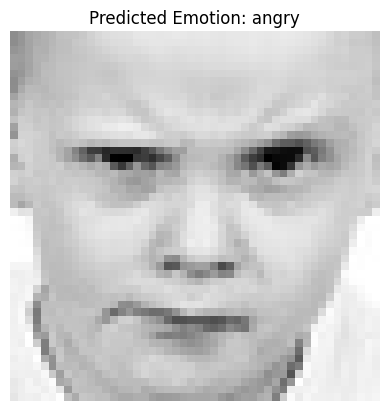

The predicted emotion for the image is: angry


In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np

# Load the class labels
class_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Function to predict emotion from a single image
def predict_emotion(image_path):
    # Load the trained model
    model = tf.keras.models.load_model('/content/emotion_detection_model.h5')

    # Load and preprocess the image
    img = load_img(image_path, target_size=(48, 48))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    # Predict the emotion
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    predicted_label = class_labels[predicted_class]

    # Display the image with the predicted emotion
    plt.imshow(img)
    plt.title(f'Predicted Emotion: {predicted_label}')
    plt.axis('off')
    plt.show()

    return predicted_label

# Example usage
image_path = '/content/drive/MyDrive/images/final test/angry/1317.jpg'
predicted_emotion = predict_emotion(image_path)
print(f'The predicted emotion for the image is: {predicted_emotion}')
